<a href="https://colab.research.google.com/github/tejas05in/Time_Series_EDA-using-stock-prices/blob/main/Timeseries_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [4]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-16,23.632000,23.143999,23.584000,23.373333,80632500.0,23.373333
2017-10-17,23.747999,23.337999,23.393999,23.716667,49399500.0,23.716667
2017-10-18,24.200001,23.608667,23.731333,23.976667,74086500.0,23.976667
2017-10-19,23.809999,23.213333,23.704000,23.454000,75927000.0,23.454000
2017-10-20,23.636667,22.955999,23.512667,23.006666,73956000.0,23.006666
...,...,...,...,...,...,...
2022-10-10,226.990005,218.360001,223.929993,222.960007,67925000.0,222.960007
2022-10-11,225.750000,215.000000,220.949997,216.500000,77013200.0,216.500000
2022-10-12,219.300003,211.509995,215.330002,217.240005,66860700.0,217.240005


# Simple moving average

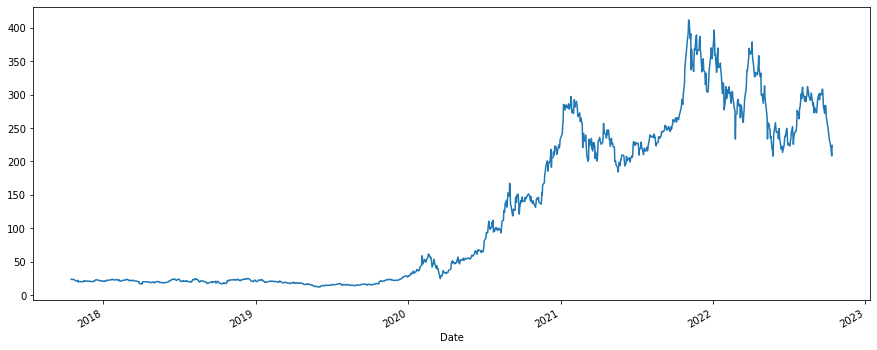

In [7]:
df_tesla['Open'].plot(figsize=(15,6))


In [8]:
df_tesla['Open: 10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods= 1).mean()

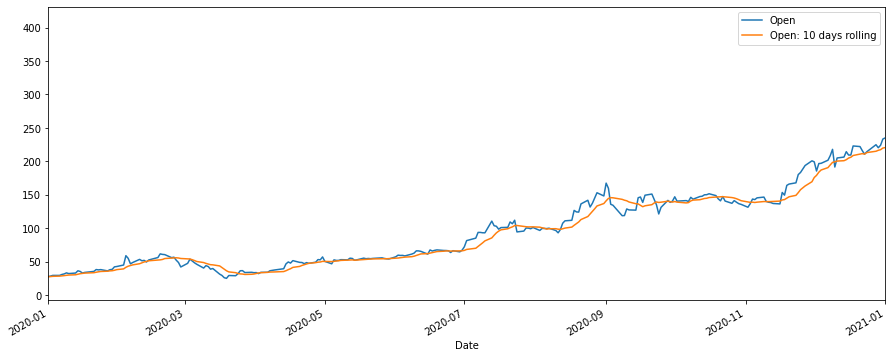

In [11]:
df_tesla[['Open','Open: 10 days rolling']].plot(xlim= ['2020-01-01','2021-01-01'],figsize = (15,6))

In [12]:
df_tesla['Open: 30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods= 1).mean()
df_tesla['Open: 50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods= 1).mean()

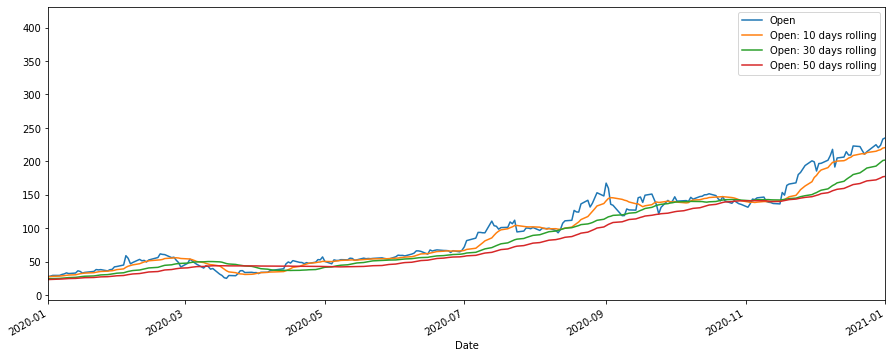

In [13]:
df_tesla[['Open','Open: 10 days rolling','Open: 30 days rolling','Open: 50 days rolling']].plot(xlim= ['2020-01-01','2021-01-01'],figsize = (15,6))

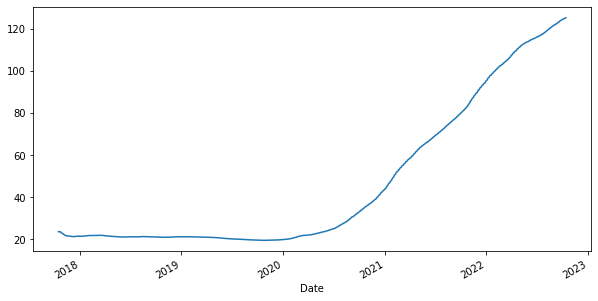

In [16]:
## Expanding
### (cumulative moving average)

df_tesla['Open'].expanding().mean().plot(figsize = (10,5))

In [26]:
# EWMA = Exponential Weighted moving average
# please note : alpha is not fixed , it is arbitrary and need to be adjusted

In [27]:
## EMA tesla shares
# Lets's smoothen with factor - 0.1(alpha)
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

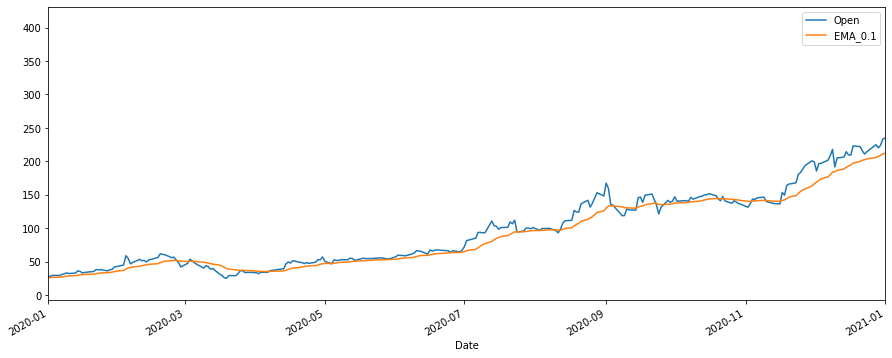

In [28]:
df_tesla[['Open','EMA_0.1']].plot(xlim= ['2020-01-01','2021-01-01'],figsize = (15,6))

In [29]:
## EMA tesla shares
# Lets's smoothen with factor - 0.3(alpha)
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()

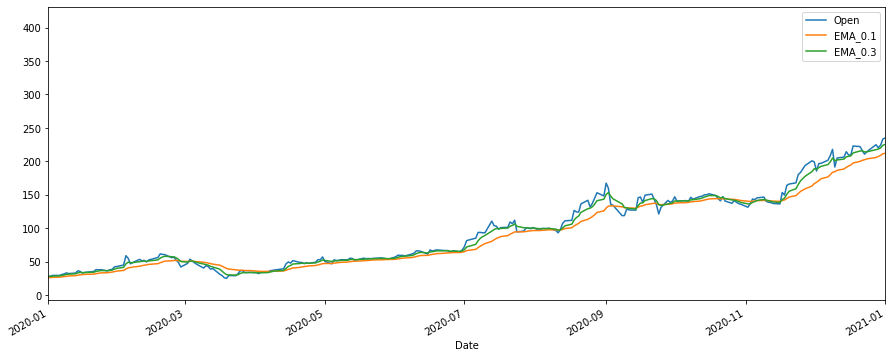

In [30]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim= ['2020-01-01','2021-01-01'],figsize = (15,6))

In [31]:
## EWMA tesla shares
# Lets's smoothen with span
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()

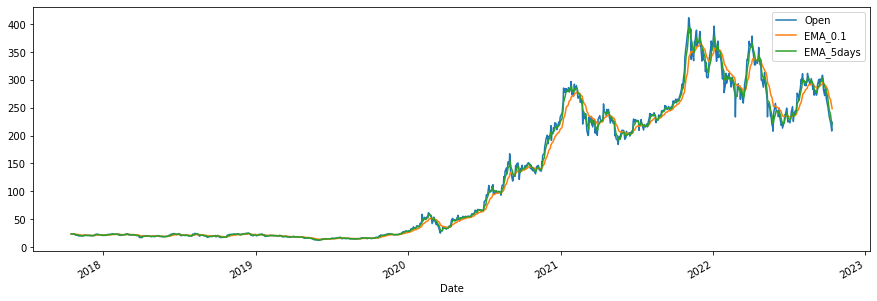

In [33]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(figsize = (15,5))